<a href="https://colab.research.google.com/github/metalicznyposmak/MLBootcamp1/blob/main/supervised/02_regression/03_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, formatter=dict(float=lambda x: f'{x:.2f}'))

sns.set(font_scale=1.3)
sklearn.__version__

'1.6.1'

# Wygenerowanie danych

In [5]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [6]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [7]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

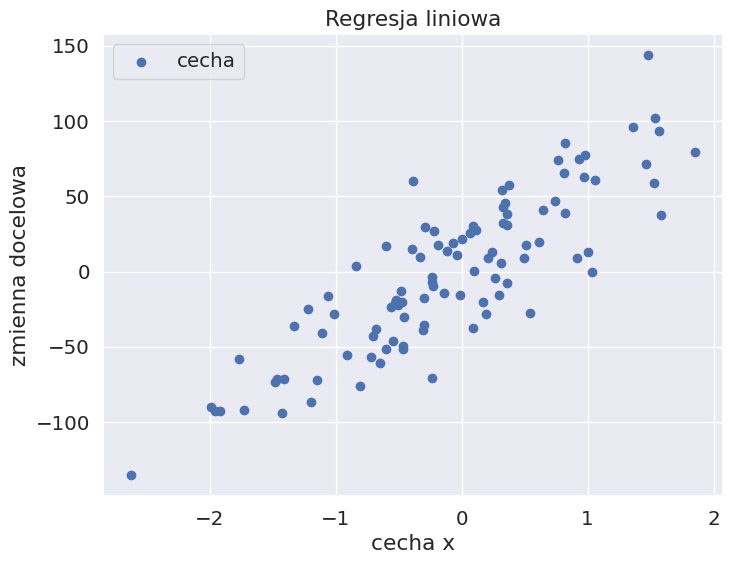

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha')
plt.legend()
plt.plot()

# Regresja liniowa przy użyciu scikit-learn

# Y = w0 + w1X1

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# metoda fit() dopasowuje model liniowy do danych
regressor.fit(data, target)

LinearRegression()

In [13]:
# metoda scor() dokonuje oceny modelu na przekazanych danych (wynik R2 score)
regressor.score(data, target)

0.7426670084336404

In [14]:
# metoda predict() dokonuje predykcji na podstawie modlu
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

# Wizualizacja graficzna modelu

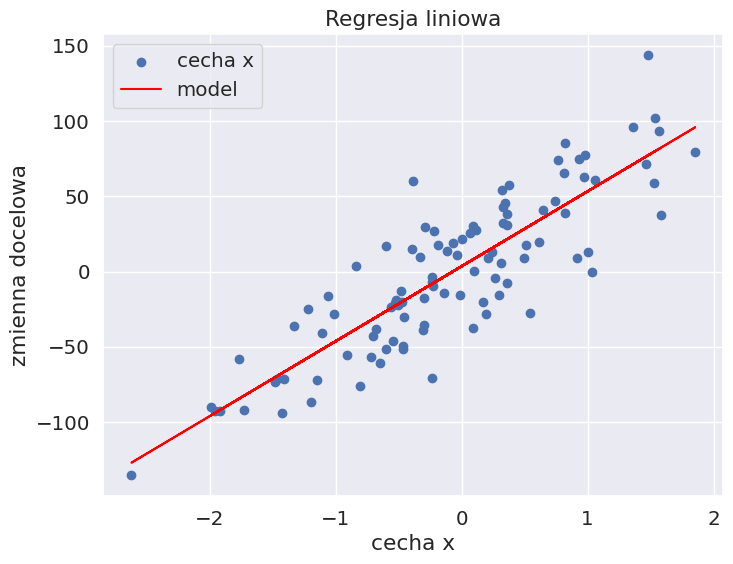

In [15]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()


# Wspólczynnik R^2

Wspolczynnik R^2 jest zdefiniowany jako 1 - u/v, gdzie u jest określone wzorem

In [ ]:
((y_true - y_pred) ** 2).sum()

Oraz v jako

In [ ]:
((y_true - y_true.mean()) ** 2).sum()

Czyli

In [ ]:
1 - ((y_true - y_pred) ** 2).sum() / ((y_true - y_true.mean()) ** 2).sum()

Najlepszą możliwą wartością jest 1.0. R^2 może przyjmować wartośc ujemną. Model, który przewiduje zawsze dla każdej próbki wartość oczekiwaną zmiennej docelowej ma wspólczynnik równy 0.

In [16]:
regressor.score(data, target)

0.7426670084336404

In [29]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_']

In [30]:
regressor.coef_

array([49.83])

In [31]:
regressor.intercept_

np.float64(3.4953459615809184)

# Końcowa postać modelu

Y = w0 + w1X1

Y = 3.495 + 49.83 * X1

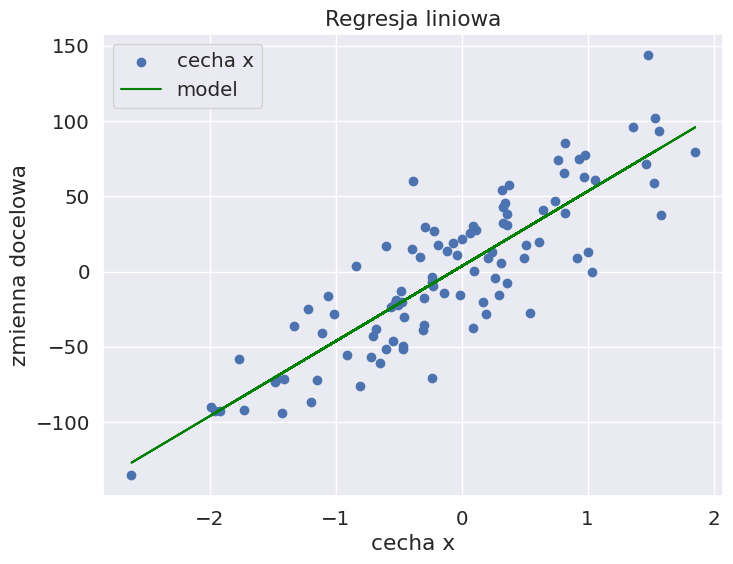

In [32]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='green', label='model')
plt.legend()
plt.show()